In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

In [88]:
def remove_number(data):
    data_copy = np.array(data.copy())

    pattern = r'\d+'
    for i in range(len(data_copy)):
        data_copy[i] = re.sub(pattern, '', data_copy[i])

    return data_copy

In [89]:
exp_date = ['230312','230320','230327','230328','230329']
raw_usecols = ['idx', 'temp', 'humi', 'reg_date', 'C7H8', 'TMA', 'VOC', 'CO2', 'HCHO',
       'H2S', 'NH3', 'CH3SH', 'SO2', 'NO2', 'CO', 'sm_idx', 'sms', 'ou',
       'sm_kind', 'label_new', '안정화']

df = pd.DataFrame()
for d in exp_date:
    try:
        df_temp = pd.read_excel('~/skim/DIC4/data/{}_data_concat.xlsx'.format(d))
        df_temp['label_org'] = df_temp['label_org'].fillna('NA')
    except:
        df_temp = pd.read_excel('~/skim/DIC4/data/{}.xlsx'.format(d), usecols = raw_usecols)
        df_temp['label_new'] = df_temp['label_new'].fillna('NA')
    # print(df_temp.head())
    df = pd.concat([df,df_temp])
df.reset_index(inplace=True)
df.head()

,index,idx,temp,humi,reg_date,C7H8,TMA,VOC,CO2,HCHO,...,SO2,NO2,CO,sm_idx,sms,ou,sm_kind,label_org,label_new,안정화
0,0,5487210,26.79962,6.237793,2023-03-13 12:52:05,0.000000,0.000026,0.192282,435.1554,0.00000,...,0.050841,0.012979,0.323783,3,2.0,0,고무,2B,NaN,0.0
1,1,5487211,26.79962,22.082520,2023-03-13 12:52:06,0.000000,0.000034,0.357748,431.6093,0.00000,...,0.190711,0.000000,0.291240,3,2.0,0,고무,2B,NaN,0.0
2,2,5487212,26.80969,32.678220,2023-03-13 12:52:08,0.000000,0.000045,0.498292,326.9812,0.00000,...,0.233748,0.000000,0.230189,9,2.0,0,(음식)비린,2B,NaN,0.0
3,3,5487213,26.82983,42.065430,2023-03-13 12:52:09,0.000944,0.000057,0.728273,295.0207,0.00000,...,0.176365,0.000000,0.205769,9,2.0,0,(음식)비린,2B,161B,1.0
4,4,5487214,26.82983,48.205570,2023-03-13 12:52:10,0.002350,0.000073,1.036101,324.5227,0.79195,...,0.130409,0.000000,0.150823,9,2.0,0,(음식)비린,2B,161B,1.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      7030 non-null   int64         
 1   idx        7030 non-null   int64         
 2   temp       7030 non-null   float64       
 3   humi       7030 non-null   float64       
 4   reg_date   7030 non-null   datetime64[ns]
 5   C7H8       7030 non-null   float64       
 6   TMA        7030 non-null   float64       
 7   VOC        7030 non-null   float64       
 8   CO2        7030 non-null   float64       
 9   HCHO       7030 non-null   float64       
 10  H2S        7030 non-null   float64       
 11  NH3        7030 non-null   float64       
 12  CH3SH      7030 non-null   float64       
 13  SO2        7030 non-null   float64       
 14  NO2        7030 non-null   float64       
 15  CO         7030 non-null   float64       
 16  sm_idx     7030 non-null   int64         


In [91]:
df['label_org'].unique()

array(['2B', '4B', '6B', '2EN', '4EN', '6EN', '2MO', '4MO', '6MO', '2ME',
       '4ME', '6ME', 'PDA', '1A', '1C', '3C', 'NA', '0ME', '1ME', '3B',
       '5B', '0EN', '1EN', '0MO', '1MO', '4A', '6A', '4C', '6C', nan],
      dtype=object)

In [92]:
# 안정화 NA값 1로 채우기(단순 누락인 것으로 보임)
df['안정화'].fillna(1, inplace=True)

In [93]:
# 5,6,7차는 label_org가 없으므로 label_new로 채워줌
df.loc[df['label_org'].isna(),'label_org'] = df['label_new']

In [94]:
# NA, PDA, 안정화 없애기
df = df.loc[~np.isin(df['label_org'],['PDA','안정화','NA'])]

In [95]:
# 종류 라벨 만들기

# ###### 세균 종류 ###### 
# df.loc[df['label_org'].str.contains('B'),'label_type'] = 'B' #바실러스
# df.loc[df['label_org'].str.contains('EN'),'label_type'] = 'EN' #엔트로코쿠스
# df.loc[df['label_org'].str.contains('MO'),'label_type'] = 'MO' #모라셀라
# df.loc[df['label_org'].str.contains('ME'),'label_type'] = 'ME' #메틸로박테리움

# ###### 곰팡이 종류 ###### 
# df.loc[df['label_org'].str.contains('A'),'label_type'] = 'A' #아스퍼질러스
# df.loc[df['label_org'].str.contains('C'),'label_type'] = 'C' #클라도스포리움

df['label_type'] = remove_number(df['label_org'])

In [96]:
df['label_type'].value_counts()

MO    1166
B     1152
EN    1087
A     1086
ME    1037
C     1003
Name: label_type, dtype: int64

In [97]:
df.to_csv('df_type_total_230403.csv',index=False)

In [98]:
# 센서 종류
sensors = ['C7H8', 'TMA', 'VOC', 'CO2', 'HCHO', 'H2S', 'NH3', 'CH3SH', 'SO2', 'NO2', 'CO']

In [99]:
df_stable = df[df['안정화']==1]

In [100]:
df_s = df_stable[sensors]
df_s_t = df_stable[['C7H8', 'TMA', 'VOC', 'CO2', 'HCHO', 'H2S', 'NH3', 'CH3SH', 'SO2', 'NO2', 'CO', 'label_type']]
df_s_d = df_stable[['C7H8', 'TMA', 'VOC', 'CO2', 'HCHO', 'H2S', 'NH3', 'CH3SH', 'SO2', 'NO2', 'CO', 'label_new']]

findfont: Font family ['NanumGothinc'] not found. Falling back to DejaVu Sans.


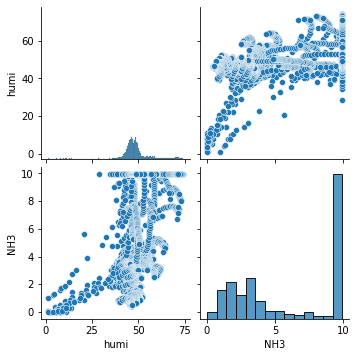

In [101]:
sns.pairplot(df_stable[['humi','NH3']])

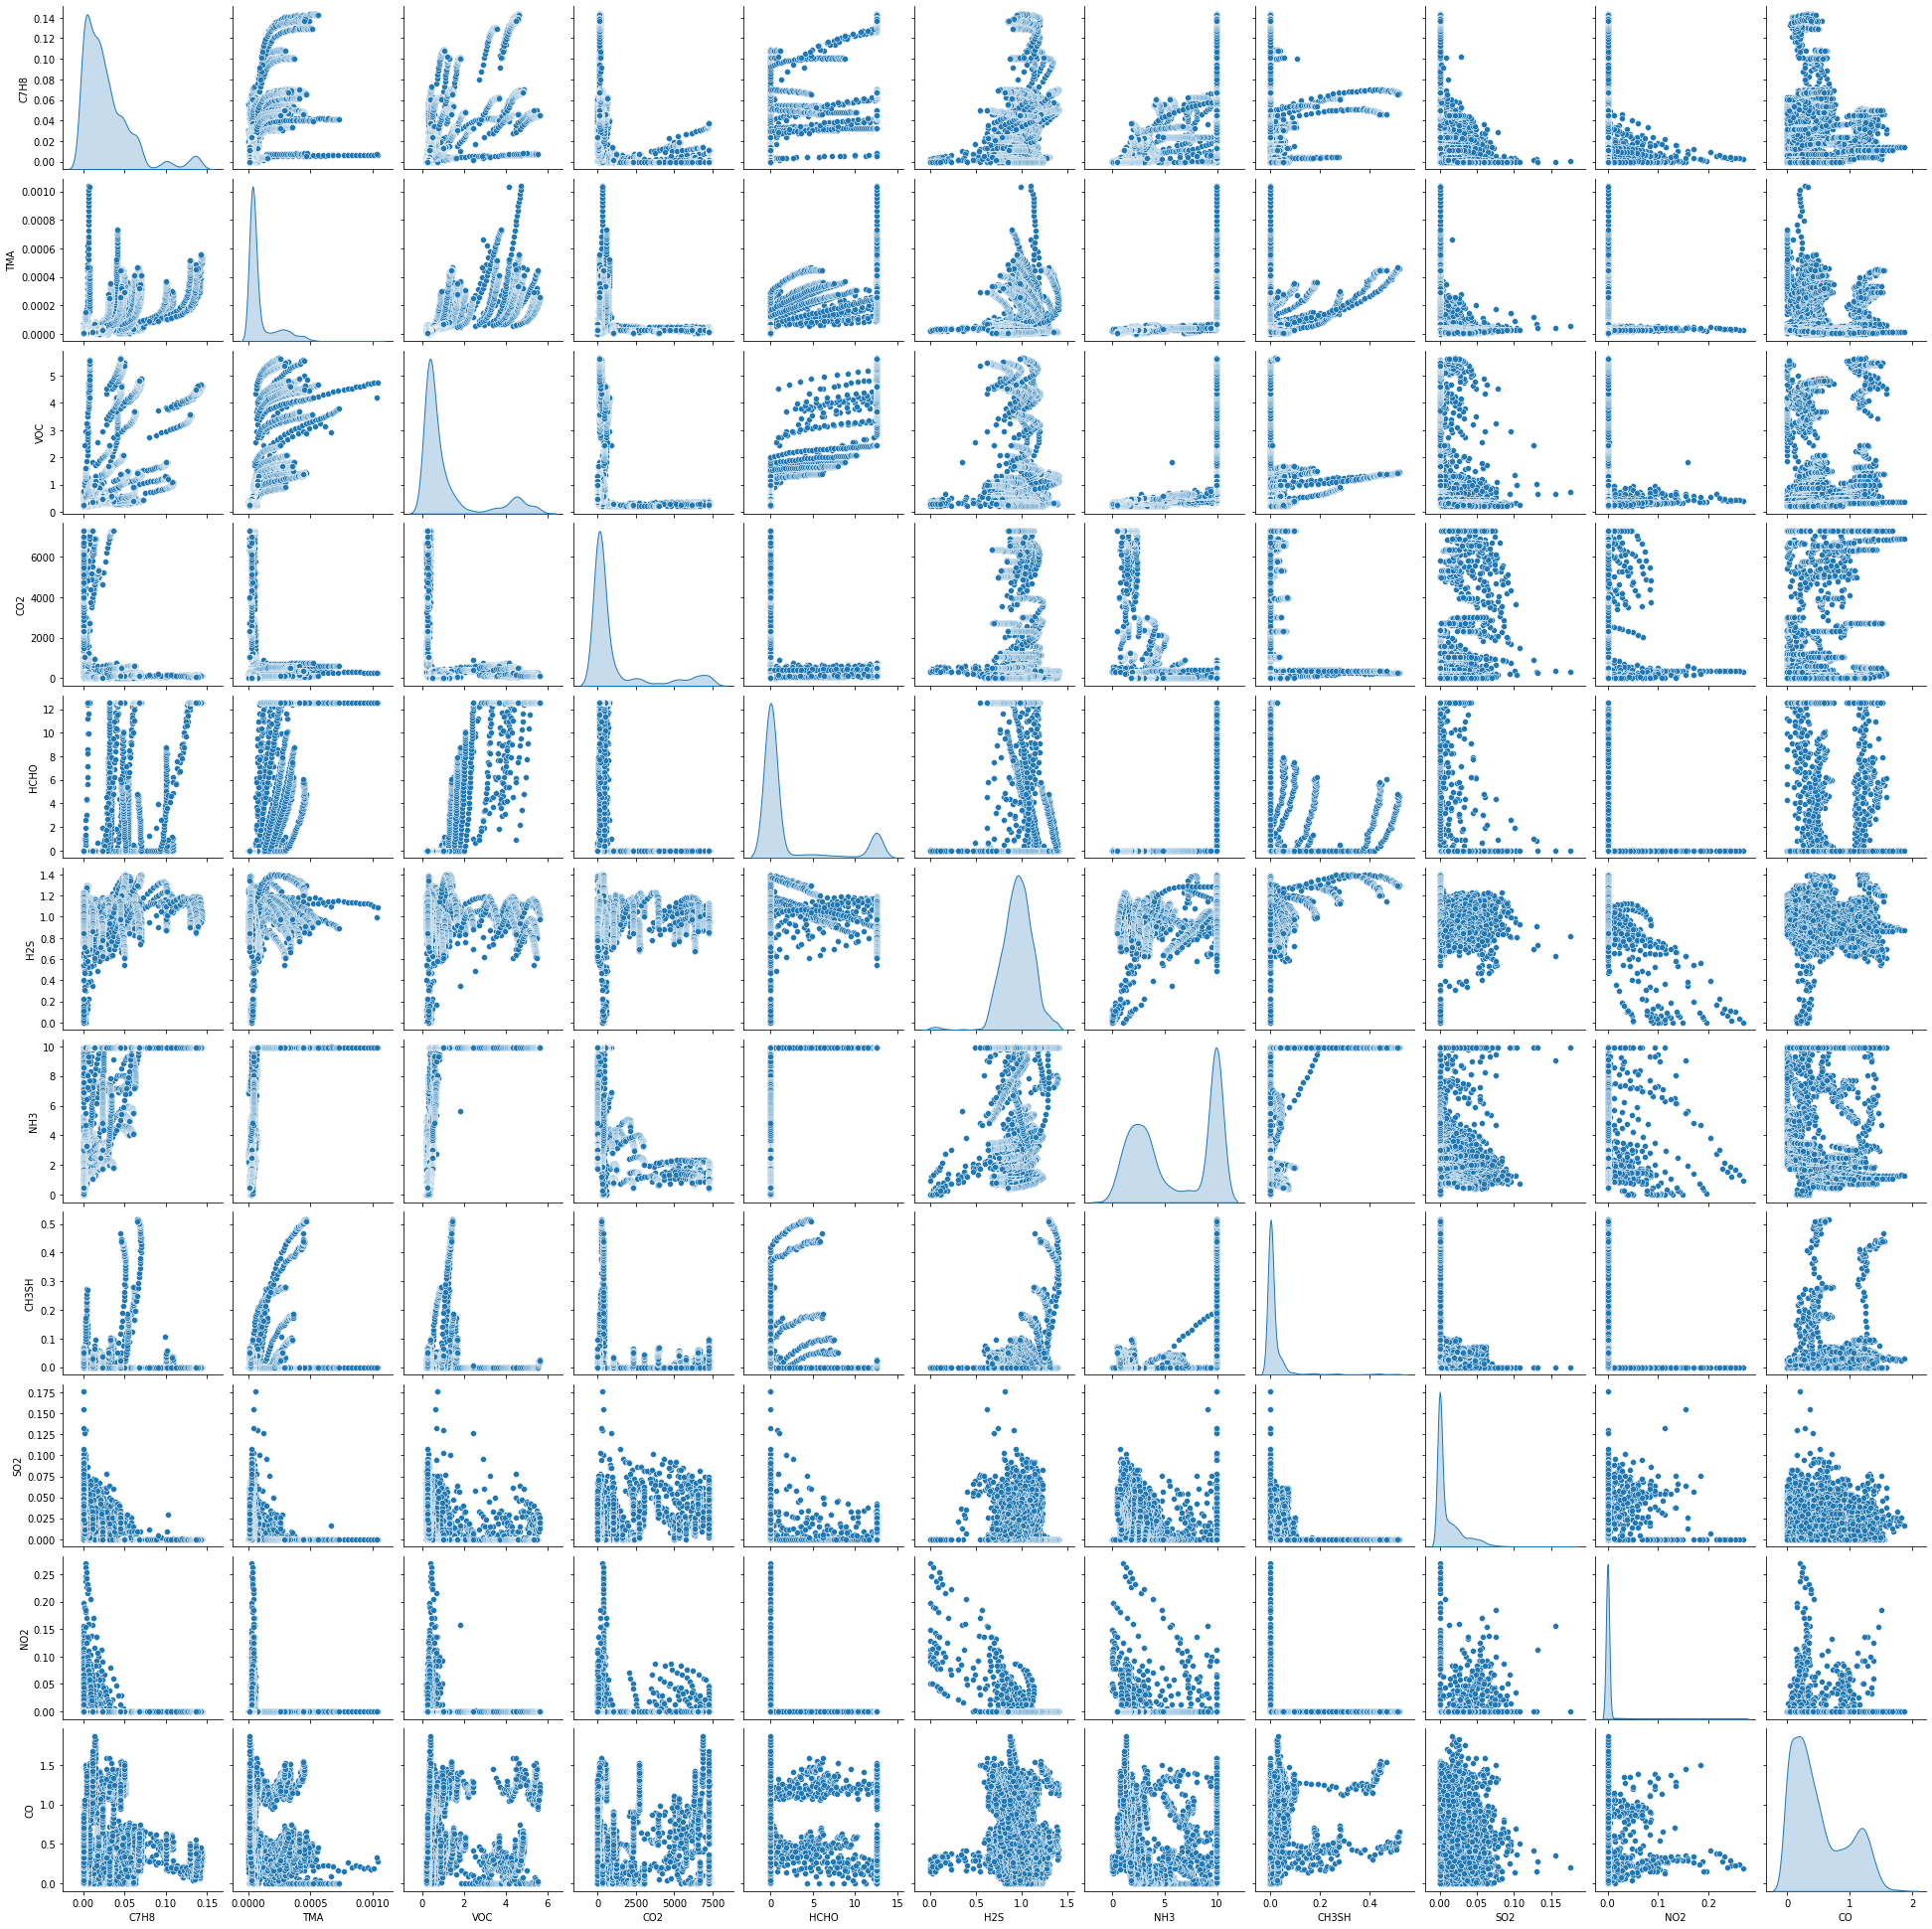

In [102]:
# pair plot
sns.pairplot(df_s, diag_kind='kde')

findfont: Font family ['NanumGothinc'] not found. Falling back to DejaVu Sans.


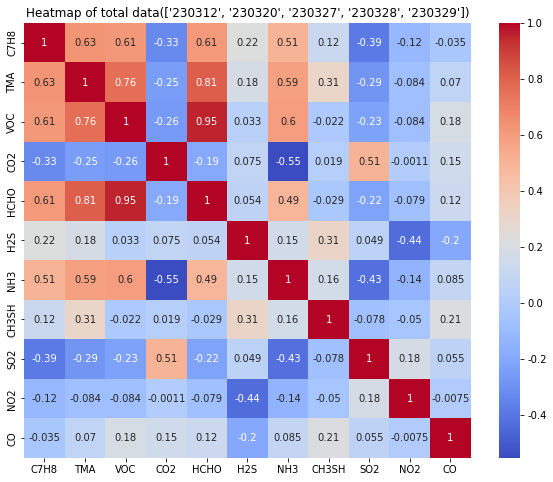

In [103]:
# Create a correlation matrix
corr_matrix = df_s.corr()

# Create a heatmap of the correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap='coolwarm')

plt.title('Heatmap of total data({})'.format(exp_date))
plt.show()

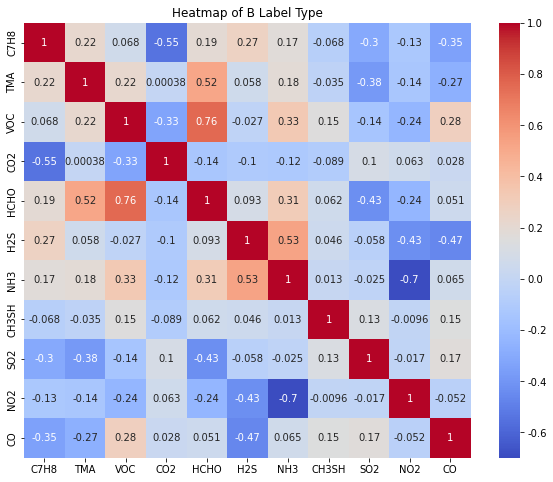

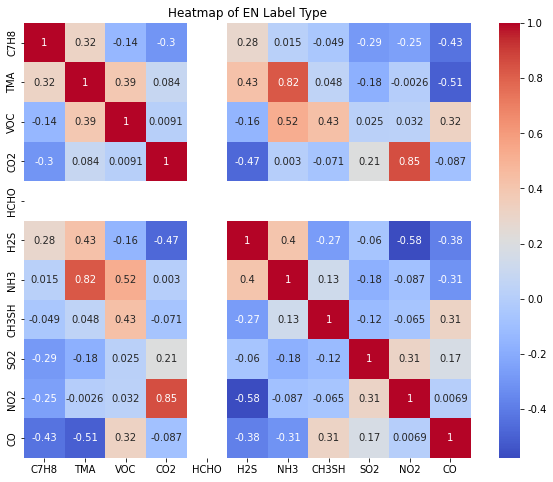

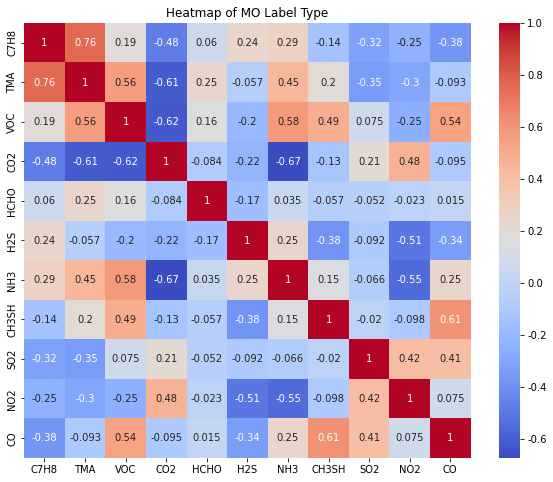

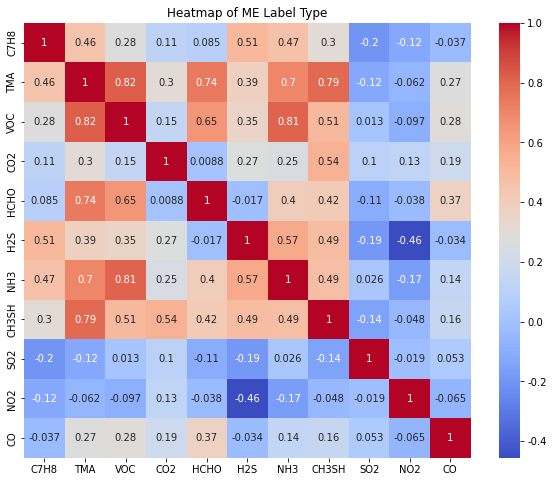

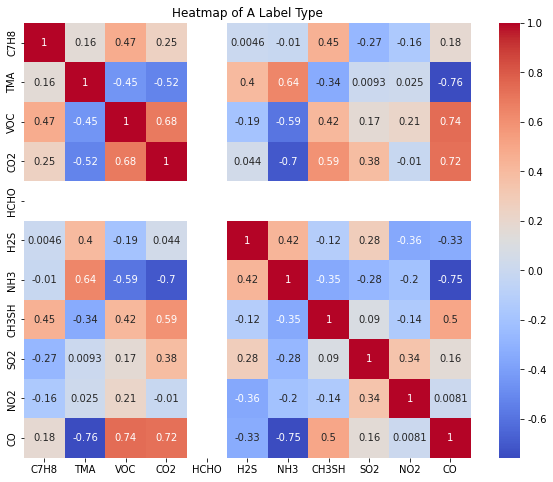

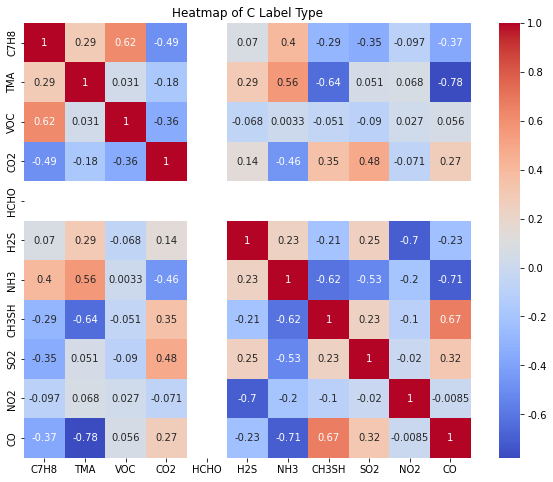

In [104]:
for label in df_s_t['label_type'].unique():
    plt.figure(figsize=(10,8))
    subset = df_s_t[df_s_t['label_type'] == label]
    sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Heatmap of {label} Label Type')
    plt.show()

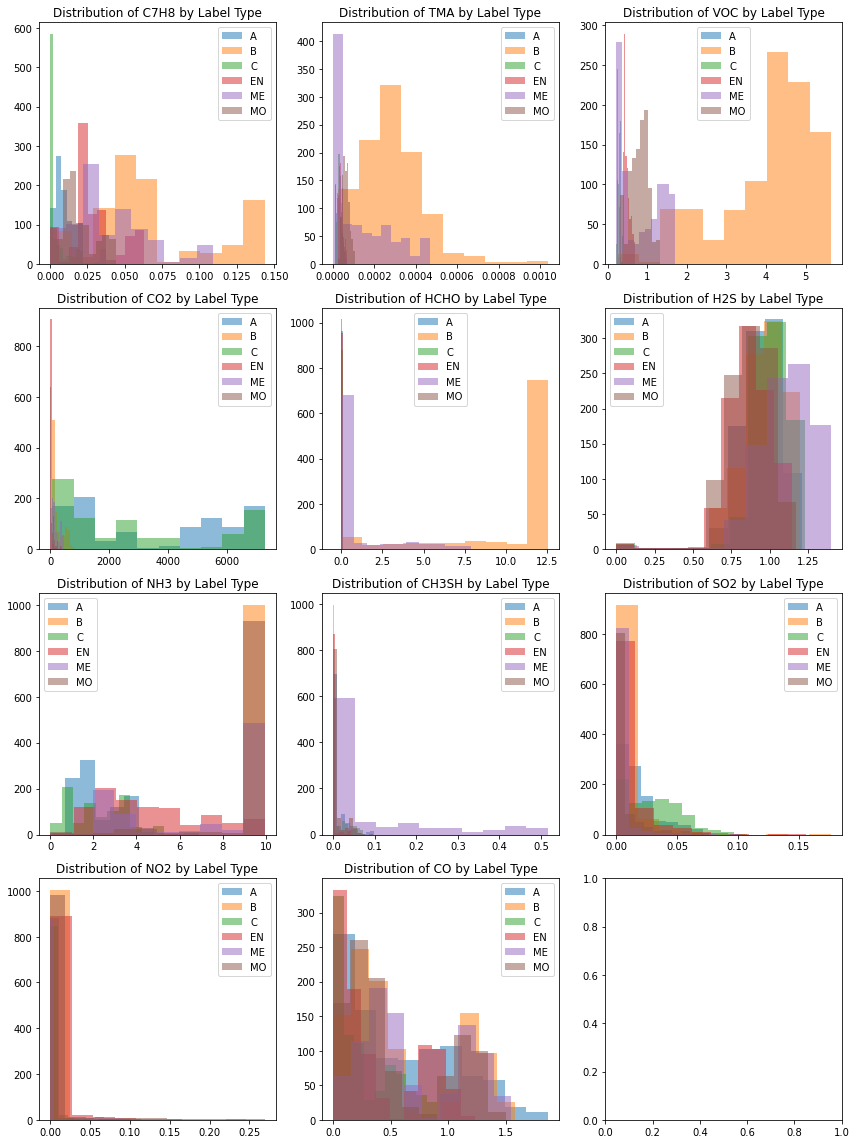

In [106]:
grouped = df_s_t.groupby('label_type')

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 16))
rows = axes.shape[0]
cols = axes.shape[1]

alpha = 0.5

i=0
for r in range(rows):
    for c in range(cols):
        for label_type, group in grouped:
            try: 
                axes[r,c].hist(group[sensors[i]], alpha=alpha, label=label_type)
                axes[r,c].set_title('Distribution of {} by Label Type'.format(sensors[i]))
                axes[r,c].legend()
            except:
                pass
        i+=1

# Adjust the layout and spacing of the subplots
fig.tight_layout()

# Show the plot
plt.show()

In [107]:
df_s_d[df_s_t['label_type']=='B']['C7H8']

3       0.000944
4       0.002350
5       0.003334
6       0.004075
7       0.004617
          ...   
5612    0.045184
5613    0.045184
5614    0.045036
5615    0.045184
5616    0.045184
Name: C7H8, Length: 1014, dtype: float64

In [108]:
sorted(df_s_d[df_s_t['label_type']=='ME']['label_new'].unique(), reverse=True)

['6ME',
 '51ME',
 '5160ME',
 '48800ME',
 '438ME',
 '3ME',
 '29ME',
 '23200ME',
 '2312222ME',
 '157ME']

In [135]:
c_order = df_s_d[df_s_t['label_type']=='C']['label_new'].unique()
b_order = ['161B', '903B','12565B', '125650B', '1138667B']
en_order = [ '4EN', '53EN','411EN','46267EN', '4499630EN']
me_order = ['3ME', '29ME', '157ME','23200ME', '2312222ME']

[
 
 '5160ME',
 '48800ME',
 
 '3ME','6ME','29ME','51ME','157ME','438ME',
 
 '23200ME',
 '2312222ME',
 ]

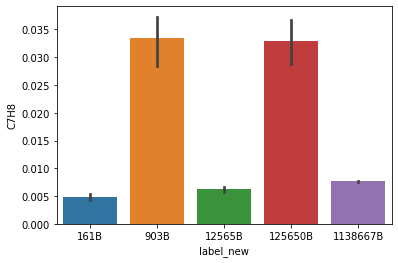

In [190]:
sns.barplot(x='label_new', y='C7H8', data = df_s_d[df_s_t['label_type']=='B'][['C7H8','label_new']], order = b_order)
plt.show()

<AxesSubplot:xlabel='label_new', ylabel='TMA'>

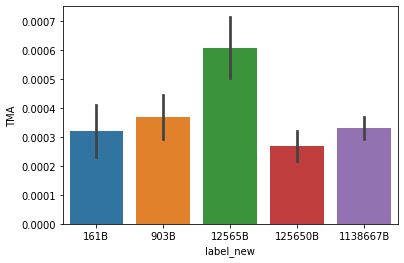

In [119]:
sns.barplot(x='label_new', y='TMA', data = df_s_d[df_s_t['label_type']=='B'][['TMA','label_new']], order = b_order)

<AxesSubplot:xlabel='label_new', ylabel='VOC'>

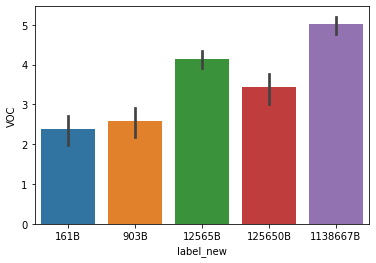

In [120]:
sns.barplot(x='label_new', y='VOC', data = df_s_d[df_s_t['label_type']=='B'][['VOC','label_new']], order = b_order)

<AxesSubplot:xlabel='label_new', ylabel='VOC'>

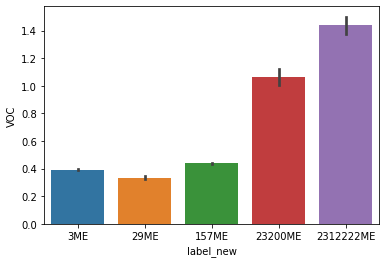

In [128]:
sns.barplot(x='label_new', y='VOC', data = df_s_d[df_s_t['label_type']=='ME'][['VOC','label_new']], order = me_order)

<AxesSubplot:xlabel='label_new', ylabel='HCHO'>

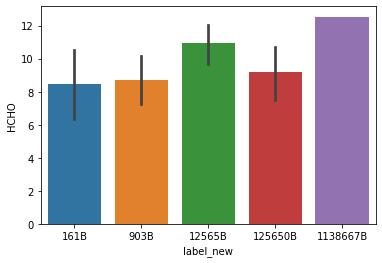

In [121]:
sns.barplot(x='label_new', y='HCHO', data = df_s_d[df_s_t['label_type']=='B'][['HCHO','label_new']], order = b_order)

<AxesSubplot:xlabel='label_new', ylabel='CO2'>

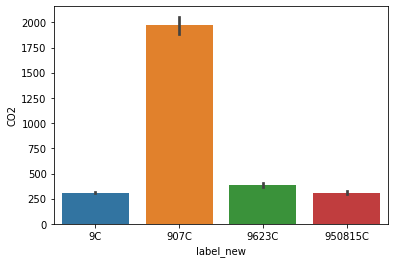

In [122]:
sns.barplot(x='label_new', y='CO2', data = df_s_d[df_s_t['label_type']=='C'][['CO2','label_new']], order = c_order)

<AxesSubplot:xlabel='label_new', ylabel='H2S'>

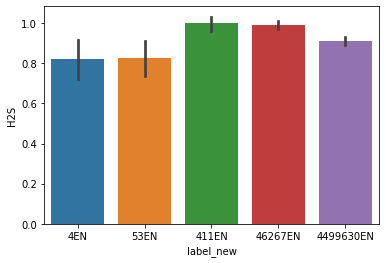

In [123]:
sns.barplot(x='label_new', y='H2S', data = df_s_d[df_s_t['label_type']=='EN'][['H2S','label_new']], order=en_order)

<AxesSubplot:xlabel='label_new', ylabel='NO2'>

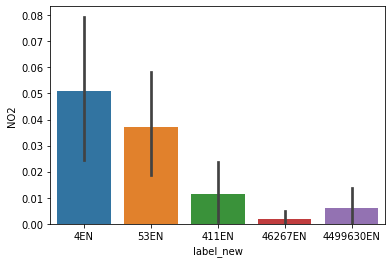

In [134]:
sns.barplot(x='label_new', y='NO2', data = df_s_d[df_s_t['label_type']=='EN'][['NO2','label_new']], order=en_order)

<AxesSubplot:xlabel='label_new', ylabel='CO'>

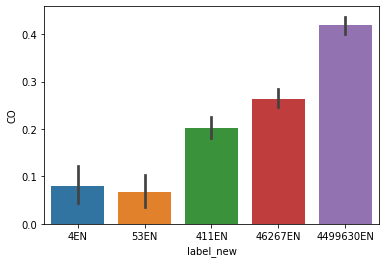

In [136]:
sns.barplot(x='label_new', y='CO', data = df_s_d[df_s_t['label_type']=='EN'][['CO','label_new']], order=en_order)

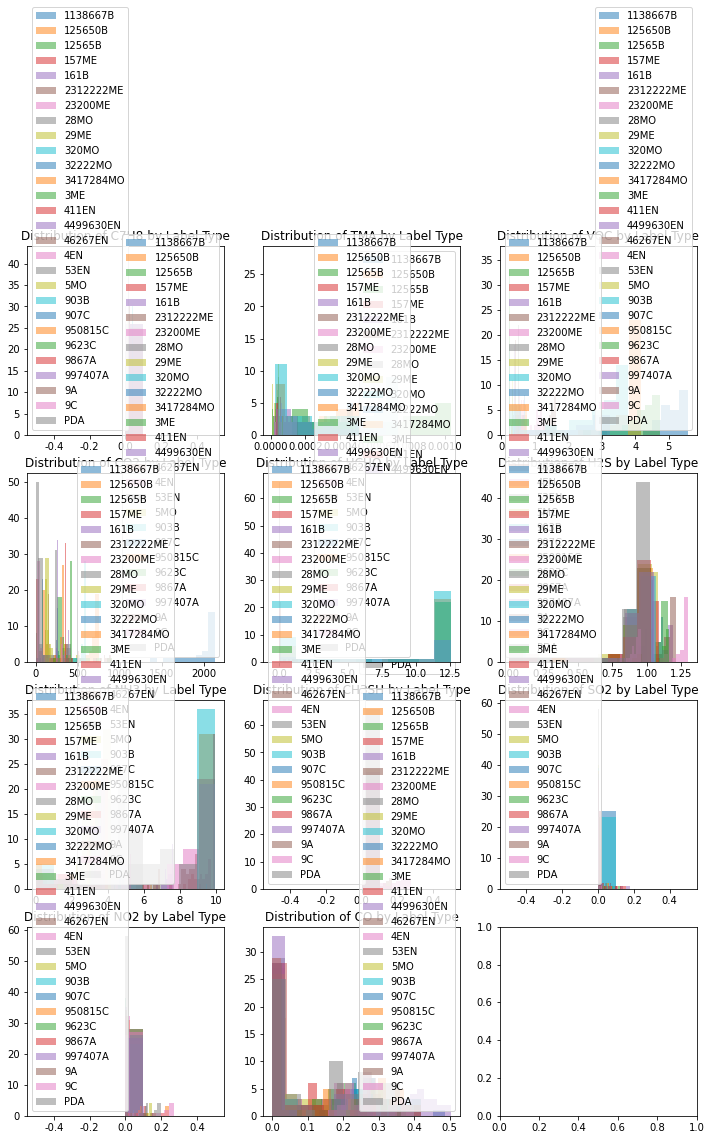

In [130]:
grouped = df_s_d.groupby('label_new')

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 16))
rows = axes.shape[0]
cols = axes.shape[1]

alpha = 0.5

i=0
for r in range(rows):
    for c in range(cols):
        for label_type, group in grouped:
            try: 
                axes[r,c].hist(group[sensors[i]], alpha=alpha, label=label_type)
                axes[r,c].set_title('Distribution of {} by Label Type'.format(sensors[i]))
                axes[r,c].legend()
            except:
                pass
        i+=1

# Adjust the layout and spacing of the subplots
fig.tight_layout()

# Show the plot
plt.show()